In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
test = pd.read_pickle("X_test.pkl")
X = pd.read_pickle("X_train.pkl")
Y = pd.read_pickle("Y_train.pkl")

In [4]:
test.head()

,0,1,2,3,4
0,1.0,19.0,1465816.0,7.0,365.0
1,1.0,2.0,98177.0,2.0,365.0
2,1.0,19.0,2052922.0,7.0,365.0
3,3.0,15.0,201906.0,5.0,365.0
4,1.0,12.0,7450.0,5.0,365.0


In [5]:
X.head()

,0,1,2,3,4
0,3.0,12.0,241719.0,3.0,0.0
1,3.0,13.0,599497.0,6.0,0.0
2,1.0,19.0,51160.0,4.0,0.0
3,3.0,9.0,3634343.0,6.0,0.0
4,1.0,17.0,4076287.0,4.0,0.0


In [6]:
Y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [7]:
Y.value_counts()

0.0    23556
1.0      234
dtype: int64

In [8]:
X[1].value_counts()

19.0    5945
12.0    4746
17.0    3766
9.0     2309
18.0    1056
15.0     920
5.0      902
13.0     886
20.0     701
14.0     590
4.0      493
11.0     307
16.0     303
3.0      281
1.0      208
8.0      135
7.0      100
2.0       78
10.0      61
0.0        2
6.0        1
Name: 1, dtype: int64

In [9]:
#find lenght of X_Train dataframe
len(X)

23790

In [10]:
len(Y)

23790

In [11]:
#Import SMOTE
from imblearn.over_sampling import SMOTE


In [12]:
#Oversample the data
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

#Turn the oversampled data into a dataframe
Y_res = pd.DataFrame(Y_res)

#Check the value counts
Y_res[0].value_counts()


0.0    23556
1.0    23556
Name: 0, dtype: int64

In [13]:
#Import Train Test Split
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 42)


In [14]:
#Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
#Import Roc Curve  
from sklearn.metrics import roc_curve, auc
#import XGBClassifier, RandomForestClassifier, KnearsNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [15]:

#Function for plotting ROC_AUC curve
def plot_roc_curve(Y_test, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4726
         1.0       0.86      0.87      0.86      4697

    accuracy                           0.86      9423
   macro avg       0.86      0.86      0.86      9423
weighted avg       0.86      0.86      0.86      9423

Confusion matrix:
 [[4034  692]
 [ 594 4103]]


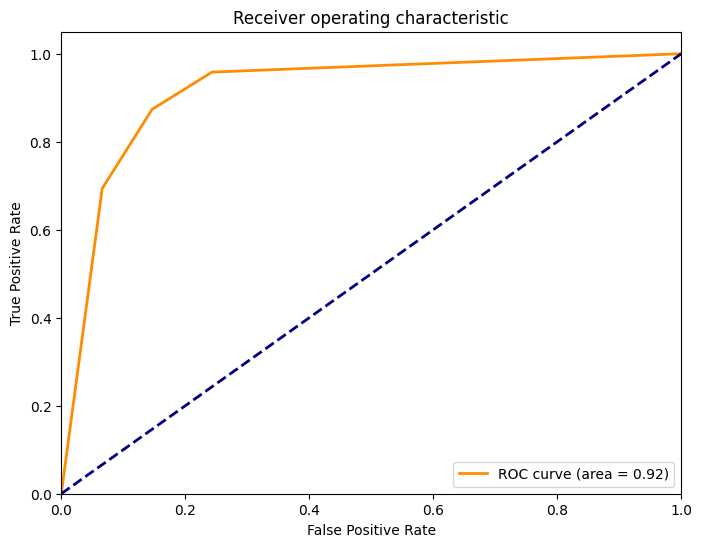

In [45]:
# Create K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, knn_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, knn_pred))
plot_roc_curve(Y_test, knn.predict_proba(X_test)[::,1])

C:\Users\galve\AppData\Local\Temp\ipykernel_21012\2594373666.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4726
         1.0       0.99      0.99      0.99      4697

    accuracy                           0.99      9423
   macro avg       0.99      0.99      0.99      9423
weighted avg       0.99      0.99      0.99      9423

Confusion matrix:
 [[4700   26]
 [  32 4665]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


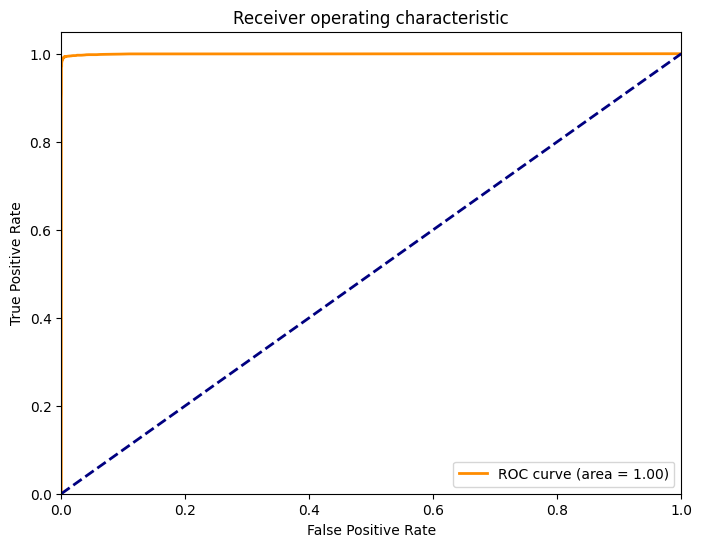

In [46]:
#Create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',verbose=1)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, rfc_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, rfc_pred))
plot_roc_curve(Y_test, rfc.predict_proba(X_test)[::,1])

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = 

[23:44:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report for classifier :               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4726
         1.0       1.00      0.99      1.00      4697

    accuracy                           1.00      9423
   macro avg       1.00      1.00      1.00      9423
weighted avg       1.00      1.00      1.00      9423

Confusion matrix:
 [[4713   13]
 [  33 4664]]


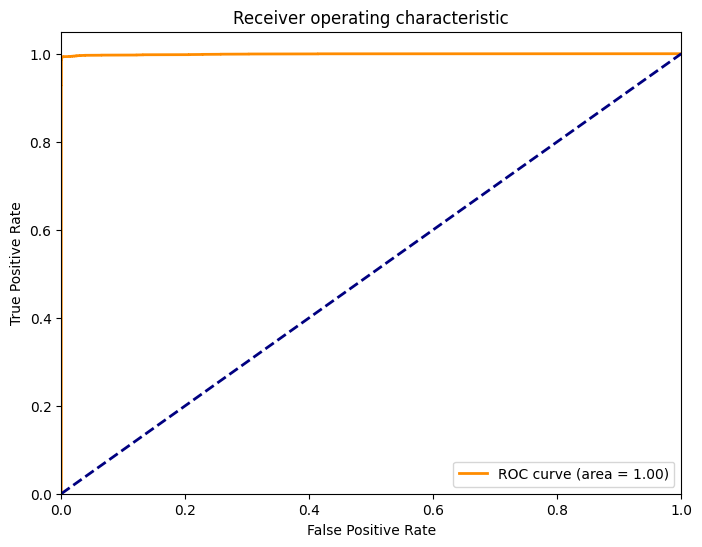

In [68]:
#Create XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42, verbosity=1)
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)

print("Classification report for classifier :", classification_report(Y_test, xgb_pred))
print("Confusion matrix:\n" , confusion_matrix(Y_test, xgb_pred))
plot_roc_curve(Y_test, xgb.predict_proba(X_test)[::,1])


In [69]:
test.head()

,0,1,2,3,4
0,1.0,19.0,1465816.0,7.0,365.0
1,1.0,2.0,98177.0,2.0,365.0
2,1.0,19.0,2052922.0,7.0,365.0
3,3.0,15.0,201906.0,5.0,365.0
4,1.0,12.0,7450.0,5.0,365.0


In [70]:
len(test)


1845

In [71]:
#Use classifier to test the test data
xgb_pred_test = xgb.predict(test)
knn_pred_test = knn.predict(test)
rfc_pred_test = rfc.predict(test)

c:\Users\galve\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [72]:
#Create a dataframe with the results
results = pd.DataFrame({'XGB':xgb_pred_test, 'KNN':knn_pred_test, 'RFC':rfc_pred_test})
results.head()



,XGB,KNN,RFC
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [73]:
results['XGB'].value_counts()

0.0    1844
1.0       1
Name: XGB, dtype: int64

In [74]:
results['KNN'].value_counts()

0.0    1364
1.0     481
Name: KNN, dtype: int64

In [75]:
results['RFC'].value_counts()

0.0    1844
1.0       1
Name: RFC, dtype: int64

In [76]:
#Predict probablity of fraud using models
xgb_pred_test_prob = xgb.predict_proba(test)
knn_pred_test_prob = knn.predict_proba(test)
rfc_pred_test_prob = rfc.predict_proba(test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [77]:
#print the probablity of fraud
print(xgb_pred_test_prob)
print(knn_pred_test_prob)
print(rfc_pred_test_prob)

[[9.9990201e-01 9.7968623e-05]
 [9.9243486e-01 7.5651384e-03]
 [9.9994838e-01 5.1622566e-05]
 ...
 [9.9995494e-01 4.5090412e-05]
 [9.9822819e-01 1.7717842e-03]
 [9.9993253e-01 6.7466928e-05]]
[[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]]


In [78]:
#Create dataframe with probablity of fraud from xgb
xgb_pred_test_prob = pd.DataFrame(xgb_pred_test_prob)
xgb_pred_test_prob.head()

,0,1
0,0.999902,0.000098
1,0.992435,0.007565
2,0.999948,0.000052
3,0.999940,0.000060
4,0.999850,0.000150


In [79]:
#Create dataframe with probablity of fraud from knn
knn_pred_test_prob = pd.DataFrame(knn_pred_test_prob)
knn_pred_test_prob.head()

,0,1
0,0.333333,0.666667
1,1.000000,0.000000
2,1.000000,0.000000
3,0.666667,0.333333
4,1.000000,0.000000


In [80]:
#Create dataframe with probablity of fraud from rfc
rfc_pred_test_prob = pd.DataFrame(rfc_pred_test_prob)
rfc_pred_test_prob.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [81]:
bTrain = pd.read_pickle("train_data.pkl")
bTest = pd.read_pickle("test_data.pkl")

In [82]:
bTrain.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
1845,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0.0
1846,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0.0
1847,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0.0
1848,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0.0
1849,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0.0


In [83]:
bTest.head()

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN


In [84]:
len(bTrain)


23790

In [85]:
len(bTest)

1845

In [87]:
#Create a dataframe with bTest alert_key column and xgb_pred_test_prob 1 column
my_submission = pd.DataFrame({'alert_key':bTest['alert_key'], 'probability':xgb_pred_test_prob[1]})
my_submission.head()




,alert_key,probability
0,352249,0.000098
1,352253,0.007565
2,352254,0.000052
3,352280,0.000060
4,352282,0.000150


In [88]:
#convert the dataframe to csv
my_submission.to_csv('submission.csv', index=False)
